In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Define colors for activities
activity_colors = {
    'standing': '#1f77b4',
    'walking': '#ff7f0e',
    'jumping': '#2ca02c',
    'still': '#d62728'
}

In [17]:
features_df = pd.read_csv('./data/extracted_datasets/extracted_test_features.csv')
test_data =  pd.read_csv('./data/extracted_datasets/extracted_test_features.csv')

In [18]:
features_df.head()

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id,source_file
0,-0.015123,0.085285,0.007274,-0.171210,0.172360,0.343570,-0.014965,0.065722,0.086615,-0.132085,...,0.082009,0.056786,0.158072,0.238277,0.052802,standing8,Jean,8,0,combined_test_data_wide.csv
1,0.009499,0.086401,0.007465,-0.208689,0.138782,0.347472,0.036865,0.053930,0.086922,-0.791803,...,0.071908,0.049370,-0.131949,0.031749,-0.080576,standing8,Jean,8,1,combined_test_data_wide.csv
2,0.009138,0.075390,0.005684,-0.208689,0.138782,0.347472,0.004663,0.043718,0.075942,-0.817064,...,0.068318,0.044225,0.591124,0.227265,0.059238,standing8,Jean,8,2,combined_test_data_wide.csv
3,-0.006388,0.051174,0.002619,-0.108277,0.110761,0.219037,0.000689,0.034623,0.051572,-0.017052,...,0.078880,0.051618,0.529714,0.302380,-0.073445,standing8,Jean,8,3,combined_test_data_wide.csv
4,-0.025488,0.057760,0.003336,-0.108277,0.094240,0.202517,-0.022584,0.049552,0.063134,0.405779,...,0.082356,0.054698,-0.061533,0.517865,-0.175328,standing8,Jean,8,4,combined_test_data_wide.csv


In [19]:
print(features_df.shape, test_data.shape) # train_data.shape, test_data.shape

(367, 123) (367, 123)


In [20]:
print(features_df.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['acc_x_mean', 'acc_x_std', 'acc_x_var', 'acc_x_min', 'acc_x_max',
       'acc_x_range', 'acc_x_median', 'acc_x_mad', 'acc_x_rms',
       'acc_x_skewness',
       ...
       'gyr_sma', 'gyr_smv', 'gyr_corr_xy', 'gyr_corr_xz', 'gyr_corr_yz',
       'activity', 'subject', 'session', 'window_id', 'source_file'],
      dtype='object', length=123)>


In [21]:
features_df.drop(columns=['source_file'], inplace=True), test_data.drop(columns=['source_file'], inplace=True)

(None, None)

In [22]:
test_data.head(5)

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,acc_corr_yz,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id
0,-0.015123,0.085285,0.007274,-0.171210,0.172360,0.343570,-0.014965,0.065722,0.086615,-0.132085,...,-0.323340,0.082009,0.056786,0.158072,0.238277,0.052802,standing8,Jean,8,0
1,0.009499,0.086401,0.007465,-0.208689,0.138782,0.347472,0.036865,0.053930,0.086922,-0.791803,...,-0.320594,0.071908,0.049370,-0.131949,0.031749,-0.080576,standing8,Jean,8,1
2,0.009138,0.075390,0.005684,-0.208689,0.138782,0.347472,0.004663,0.043718,0.075942,-0.817064,...,-0.301966,0.068318,0.044225,0.591124,0.227265,0.059238,standing8,Jean,8,2
3,-0.006388,0.051174,0.002619,-0.108277,0.110761,0.219037,0.000689,0.034623,0.051572,-0.017052,...,-0.162716,0.078880,0.051618,0.529714,0.302380,-0.073445,standing8,Jean,8,3
4,-0.025488,0.057760,0.003336,-0.108277,0.094240,0.202517,-0.022584,0.049552,0.063134,0.405779,...,0.115740,0.082356,0.054698,-0.061533,0.517865,-0.175328,standing8,Jean,8,4


In [23]:
features_df.isnull().sum()

acc_x_mean     0
acc_x_std      0
acc_x_var      0
acc_x_min      0
acc_x_max      0
              ..
gyr_corr_yz    0
activity       0
subject        0
session        0
window_id      0
Length: 122, dtype: int64

In [24]:
numeric_features = features_df.select_dtypes(include=[np.number]).columns
print(features_df[numeric_features[:10]].describe())

print("\n3.5 Activities in Features:")
feature_activity_counts = features_df['activity'].value_counts().sort_index()
print(feature_activity_counts)

       acc_x_mean   acc_x_std   acc_x_var   acc_x_min   acc_x_max  \
count  367.000000  367.000000  367.000000  367.000000  367.000000   
mean    -0.110648    1.237141    6.205690   -3.691486    1.447152   
std      0.465308    2.165166   15.653900    6.986025    2.132674   
min     -2.632107    0.002751    0.000008  -32.597130   -0.335811   
25%     -0.207867    0.006709    0.000045   -2.454331    0.013226   
50%     -0.001110    0.242005    0.058566   -0.221727    0.175920   
75%      0.002145    1.127132    1.270597   -0.013338    2.187192   
max      1.469608    9.965429   99.309766    0.596676    8.791828   

       acc_x_range  acc_x_median   acc_x_mad   acc_x_rms  acc_x_skewness  
count   367.000000    367.000000  367.000000  367.000000      367.000000  
mean      5.138638      0.218457    0.502122    1.315763       -0.372335  
std       8.741003      0.742409    0.780925    2.171513        0.877227  
min       0.011230     -1.338087    0.001650    0.003050       -4.700236  
25%

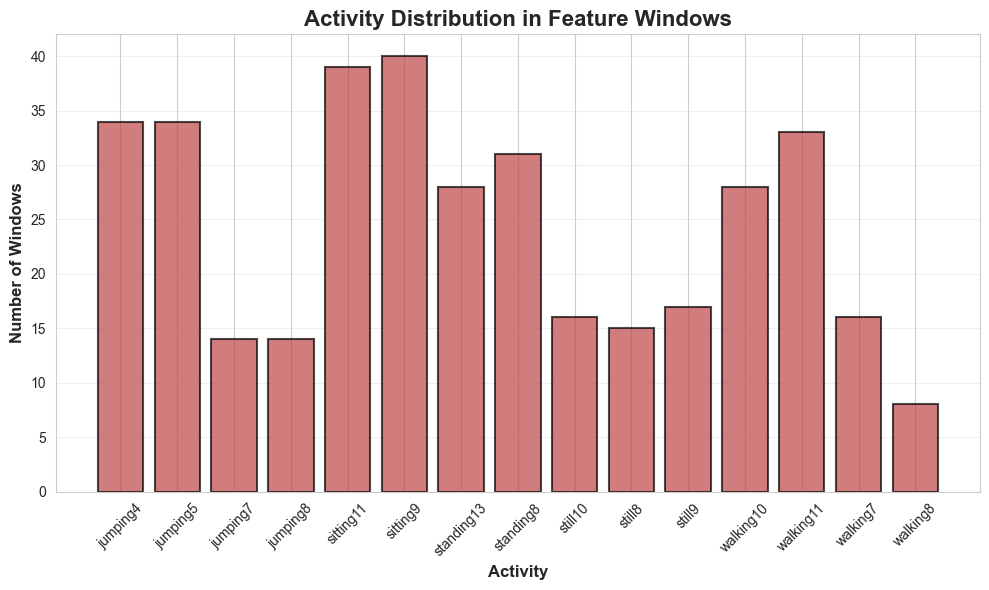

In [26]:
plt.figure(figsize=(10, 6))
colors_list = [activity_colors.get(act.lower(), "#C04646") for act in feature_activity_counts.index]
bars = plt.bar(feature_activity_counts.index, feature_activity_counts.values, 
               color=colors_list, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title('Activity Distribution in Feature Windows', fontsize=16, fontweight='bold')
plt.xlabel('Activity', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Windows', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()


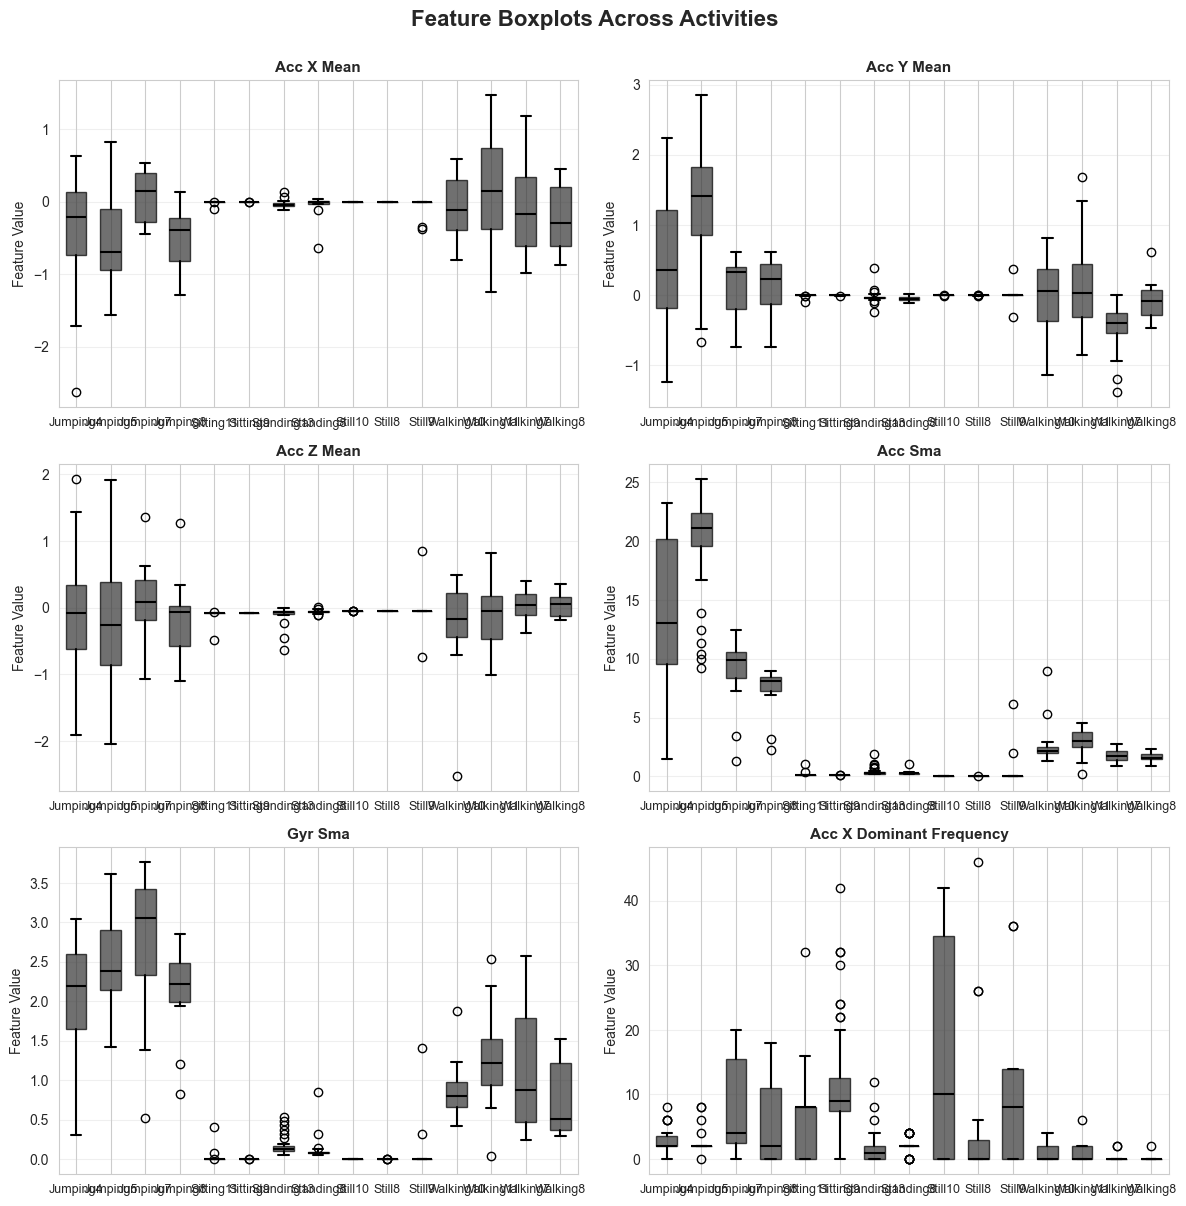

In [27]:
# Select features for boxplots
boxplot_features = [
    'acc_x_mean', 'acc_y_mean', 'acc_z_mean',
    'acc_sma', 'gyr_sma', 'acc_x_dominant_frequency'
]
boxplot_features = [f for f in boxplot_features if f in features_df.columns]

n_cols = 2
n_rows = (len(boxplot_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if isinstance(axes, plt.Axes) else axes

for idx, feature in enumerate(boxplot_features):
    ax = axes[idx]
    
    data_to_plot = []
    labels = []
    colors_list = []
    
    for activity in sorted(features_df['activity'].unique()):
        activity_data = features_df[features_df['activity'] == activity][feature]
        data_to_plot.append(activity_data)
        labels.append(activity.capitalize())
        colors_list.append(activity_colors.get(activity.lower(), '#333333'))
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, widths=0.6)
    
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.5)
    
    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_ylabel('Feature Value', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', labelsize=9)

# Hide unused subplots
for idx in range(len(boxplot_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Boxplots Across Activities', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()


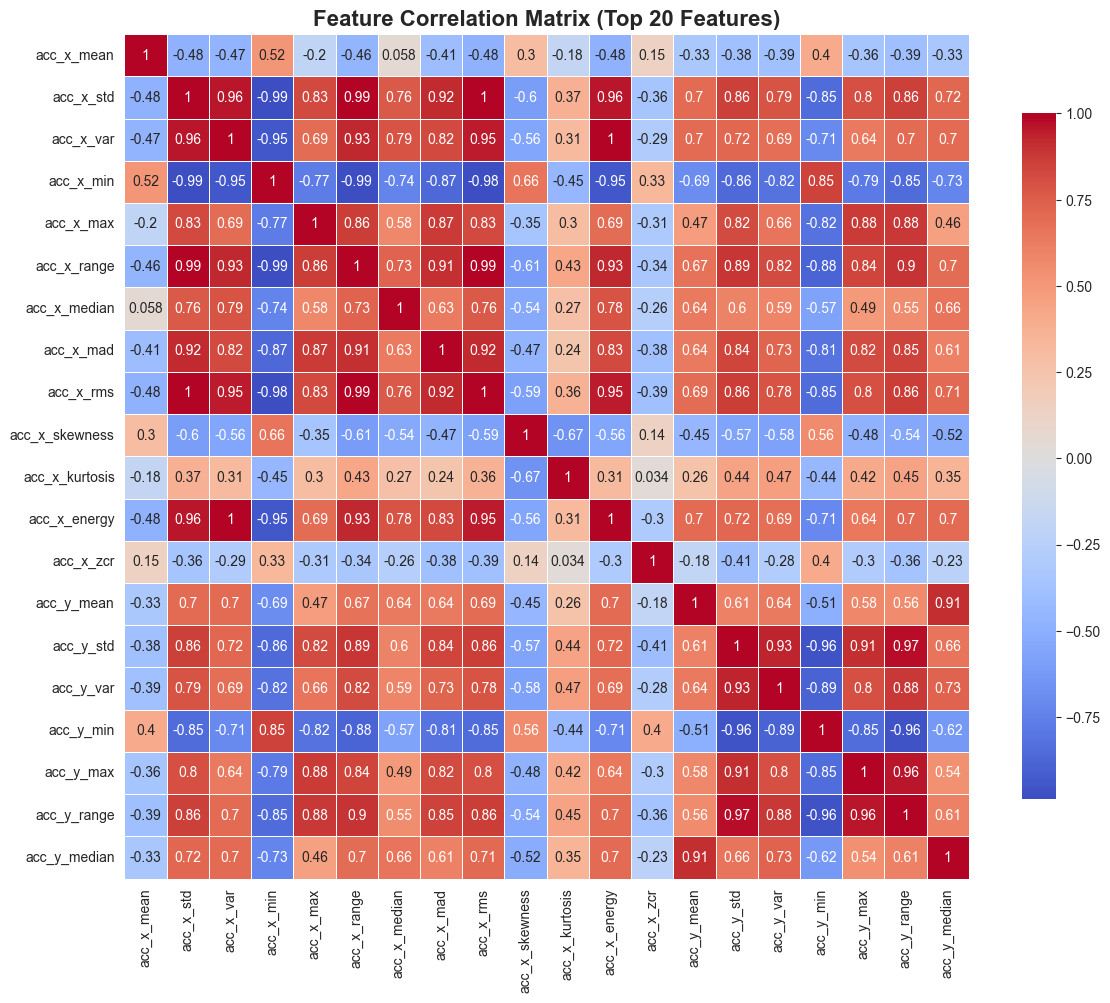

In [28]:
# Select numeric columns
numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Limit to top features for clearer visualization
top_n = 20
if len(numeric_cols) > top_n:
    numeric_cols = numeric_cols[:top_n]

# Calculate correlation matrix
corr_matrix = features_df[numeric_cols].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
           annot=True, 
           cmap='coolwarm', 
           center=0,
           square=True, 
           linewidths=0.5, 
           cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix (Top 20 Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

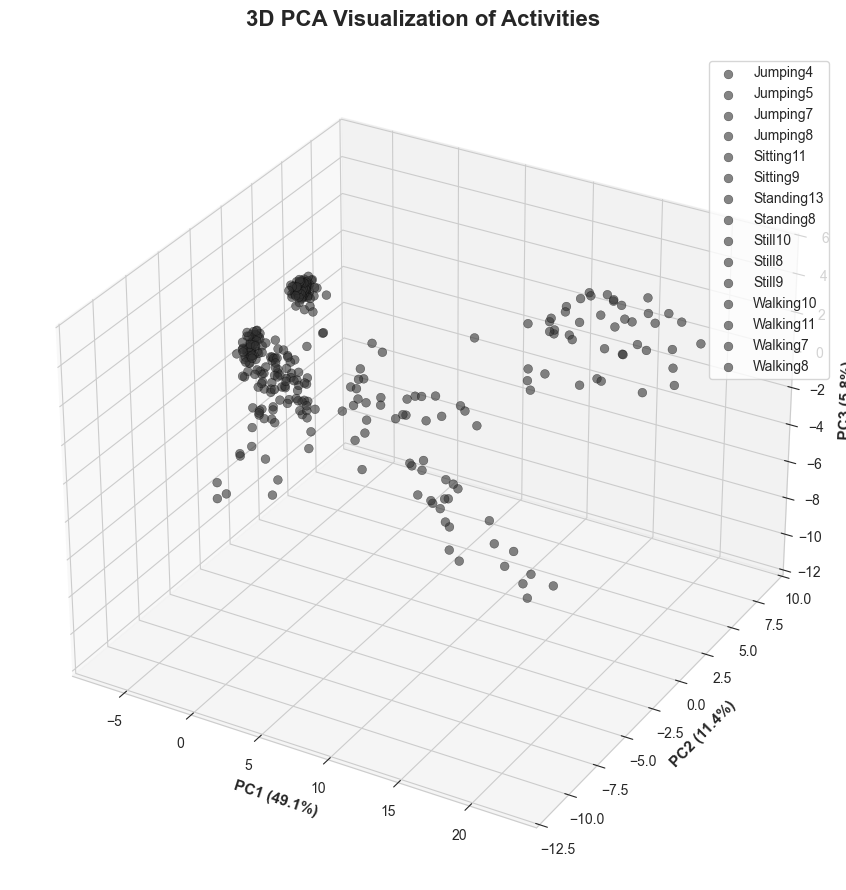

In [29]:

numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

X = features_df[numeric_cols].fillna(0).values
y = features_df['activity'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for activity in sorted(set(y)):
    mask = y == activity
    color = activity_colors.get(activity.lower(), '#333333')
    ax.scatter(X_pca_3d[mask, 0], 
              X_pca_3d[mask, 1], 
              X_pca_3d[mask, 2],
              label=activity.capitalize(), 
              alpha=0.6, 
              color=color, 
              s=40, 
              edgecolors='black', 
              linewidth=0.3)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_title('3D PCA Visualization of Activities', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Define Model Components

In [36]:
"""
Improved HMM training pipeline with Model Component Definition
---------------------------------------------------------------
This version adds explicit definition of HMM model components:
- Hidden states (activities)
- Observations (feature vectors)
- Transition probabilities (A)
- Emission probabilities (B)
- Initial state probabilities (π)
"""

import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM

# ---------------------------------------------
# Define Model Components (Task 3)
# ---------------------------------------------

# Hidden States (Z): activities
hidden_states = ['standing', 'walking', 'jumping', 'still']

# Example: Observations (X) — numerical feature vectors from accelerometer & gyroscope
# (in practice, this will come from your preprocessed feature dataset)
# For demonstration, let's assume each observation has 6 features: acc_x, acc_y, acc_z, gyr_x, gyr_y, gyr_z
n_features = 6

# Transition Probabilities (A): P(Z_t | Z_{t-1})
# Here we initialize with uniform probabilities (can be learned later)
n_states = len(hidden_states)
A = np.full((n_states, n_states), 1/n_states)

# Emission Probabilities (B): P(X_t | Z_t)
# GaussianHMM uses diagonal covariances when covariance_type='diag'
means = np.random.randn(n_states, n_features)  # random initial means
covars = np.full((n_states, n_features), 1.0)  # each state has diagonal variances

# Initial State Probabilities (π)
pi = np.full(n_states, 1/n_states)

# Create GaussianHMM model
model = GaussianHMM(
    n_components=n_states,
    covariance_type='diag',
    n_iter=100,
    init_params='mc',
    params='mc'
)

# Assign parameters
model.startprob_ = pi
model.transmat_ = A
model.means_ = means
model.covars_ = covars

print("HMM structure defined successfully:")
print(f"Hidden States (Z): {hidden_states}")
print(f"Transition Matrix (A):\\n{A}")
print(f"Initial Probabilities (π): {pi}")
print(f"Mean Emission Parameters (B means):\\n{means}")
print(f"Diagonal Covariances (B covariances):\\n{covars}")


HMM structure defined successfully:
Hidden States (Z): ['standing', 'walking', 'jumping', 'still']
Transition Matrix (A):\n[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
Initial Probabilities (π): [0.25 0.25 0.25 0.25]
Mean Emission Parameters (B means):\n[[-0.71502187 -1.02857653 -2.24814289  1.2613181  -0.32782353 -0.33849396]
 [ 1.49610223 -0.4759886  -0.84047094 -0.22474562 -1.13266905  0.34435577]
 [-0.37366208 -0.50727141 -0.59390317 -0.10622149  0.08348113 -0.51997509]
 [-0.35876594 -0.08152283 -0.18241814  0.03107597 -0.6766708   1.00459291]]
Diagonal Covariances (B covariances):\n[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


## Model Implementation


In [37]:
!pip install hmmlearn


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


Loaded train: (30227, 12)  test: (9201, 12)
Using label column: activity
Numeric features used (train): 10 columns
After cleaning - X_train: (30227, 10)  X_test: (9201, 10)
⚠️ Warning: Removing unseen test labels: ['jumping7' 'jumping8' 'sitting11' 'standing13' 'standing8' 'still10'
 'still8' 'still9' 'walking10' 'walking11']

Attempting to train hmmlearn GaussianHMM with n_states=37 ...


         1 -445403.49949083             +nan
         2 -275056.32486978 +170347.17462105
         3 -164544.40593154 +110511.91893824
         4  -94890.15262545  +69654.25330610
         5  -40237.43429603  +54652.71832942
         6  -15697.09177885  +24540.34251717
         7    5645.12881481  +21342.22059367
         8   25661.32874377  +20016.19992895
         9   49744.10306923  +24082.77432546
        10   82135.88168123  +32391.77861200
        11  104240.81259409  +22104.93091286
        12  109685.26246847   +5444.44987439
        13  114251.46002516   +4566.19755668
        14  119204.81212688   +4953.35210172
        15  123618.75271105   +4413.94058417
        16  129695.99963260   +6077.24692155
        17  134346.52750642   +4650.52787381
        18  138953.52616627   +4606.99865985
        19  143627.63493700   +4674.10877073
        20  146704.53325642   +3076.89831942
        21  148319.26357221   +1614.73031579
        22  149647.27772170   +1328.01414949
        23

hmmlearn approach failed or diverged: NaN in trained parameters (startprob_ or transmat_)

FALLBACK: Training discrete HMM (KMeans + custom Baum-Welch + Viterbi)
Saved discrete fallback model -> trained_hmm_discrete.pkl

Trained with: discrete_fallback


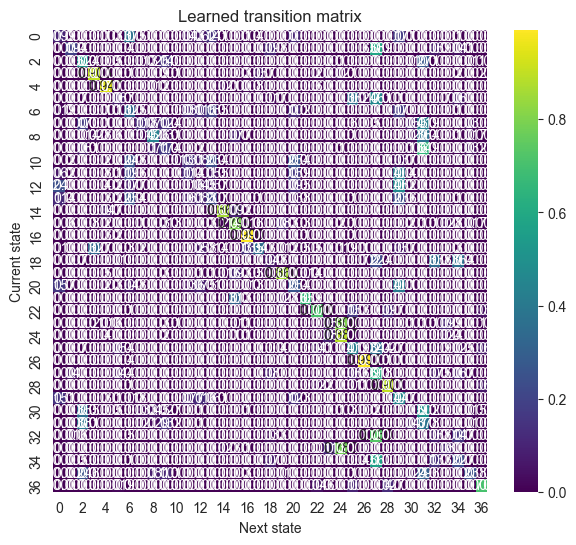

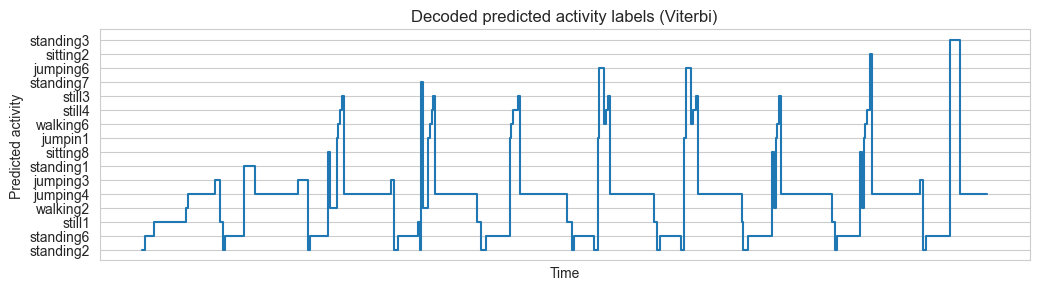

Done. Files saved: trained_hmmlearn.pkl or trained_hmm_discrete.pkl (depending on route).


In [46]:
# ========== HMM Implementation (uses your real preprocessed data) ==========
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Try to load the files exactly as in your directory screenshot
train_path = "Data/merged_datasets/combined_train_data.csv"
test_path  = "Data/merged_datasets/combined_test_data.csv"
for p in (train_path, test_path):
    if not os.path.exists(p):
        raise FileNotFoundError(f"Expected dataset not found at: {p}")

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)
print("Loaded train:", train_df.shape, " test:", test_df.shape)

# ----------------- choose label column -----------------
label_candidates = [c for c in train_df.columns if c.lower() in ('activity','label','class','target')]
if label_candidates:
    label_col = label_candidates[0]
else:
    # fallback: try columns named similarly in test, else use last column
    t_cands = [c for c in test_df.columns if c.lower() in ('activity','label','class','target')]
    label_col = t_cands[0] if t_cands else train_df.columns[-1]
print("Using label column:", label_col)

# ----------------- numeric feature selection -----------------
# drop non-numeric columns (e.g., names, timestamps). Keep numeric sensor features only.
train_num = train_df.select_dtypes(include=[np.number]).copy()
test_num  = test_df.select_dtypes(include=[np.number]).copy()
if train_num.shape[1] == 0:
    raise ValueError("No numeric columns found in train CSV. Inspect your CSV columns.")
print("Numeric features used (train):", train_num.shape[1], "columns")

# Align labels to rows that remain after numeric selection (if numeric selection dropped label column)
# We'll use original indices to map labels when dropping NaNs later
y_train_all = train_df[label_col].astype(str).values
y_test_all  = test_df[label_col].astype(str).values

# Remove rows with NaN/Inf in numeric data
train_num = train_num.replace([np.inf, -np.inf], np.nan).dropna()
test_num  = test_num.replace([np.inf, -np.inf], np.nan).dropna()
train_idx = train_num.index.to_numpy()
test_idx  = test_num.index.to_numpy()
X_train = train_num.values
X_test  = test_num.values
y_train = y_train_all[train_idx]
y_test  = y_test_all[test_idx]

print("After cleaning - X_train:", X_train.shape, " X_test:", X_test.shape)

# ----------------- encode labels and filter unseen test labels -----------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

mask_known = np.isin(y_test, le.classes_)
if not np.all(mask_known):
    unseen = np.unique(y_test[~mask_known])
    print("⚠️ Warning: Removing unseen test labels:", unseen)
    X_test = X_test[mask_known]
    y_test = y_test[mask_known]
y_test_enc = le.transform(y_test)

# ----------------- standardize -----------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ----------------- Try hmmlearn GaussianHMM (with safety) -----------------
use_hmmlearn = True
trained_with = None
try:
    from hmmlearn import hmm
    # choose number of components = number of distinct activities in training labels
    n_states = max(2, len(np.unique(y_train_enc)))
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag",
                             n_iter=100, tol=1e-3, random_state=42, verbose=True)
    # numerical stability: minimum covariance
    model.min_covar = 1e-3
    print(f"\nAttempting to train hmmlearn GaussianHMM with n_states={n_states} ...")
    model.fit(X_train)
    # check for NaNs in important params
    if np.isnan(model.startprob_).any() or np.isnan(model.transmat_).any():
        raise ValueError("NaN in trained parameters (startprob_ or transmat_)")
    # decode test
    logprob, hidden_states = model.decode(X_test, algorithm="viterbi")
    decoded_labels = le.inverse_transform(np.clip(hidden_states, 0, len(le.classes_)-1))
    trained_with = "hmmlearn"
    # save model
    import joblib
    joblib.dump(model, "trained_hmmlearn.pkl")
    print("hmmlearn model trained and saved to trained_hmmlearn.pkl")
except Exception as e:
    print("hmmlearn approach failed or diverged:", str(e))
    use_hmmlearn = False

# ----------------- If hmmlearn failed -> fallback discrete HMM implemented in numpy -----------------
if not use_hmmlearn:
    print("\nFALLBACK: Training discrete HMM (KMeans + custom Baum-Welch + Viterbi)")
    # convert continuous features -> discrete observation symbols by clustering
    N_OBS = min(12, max(4, int(np.sqrt(X_train.shape[0]))))  # reasonable cluster count
    kmeans = KMeans(n_clusters=N_OBS, random_state=42, n_init=10)
    # fit on train features combined (safer)
    kmeans.fit(np.vstack([X_train, X_test]) if X_test.size else X_train)
    O_train = kmeans.predict(X_train)
    O_test  = kmeans.predict(X_test) if X_test.size else np.array([], dtype=int)
    T = len(O_train)

    # Discrete HMM class (Baum-Welch + Viterbi) - concise implementation
    class DiscreteHMM:
        def __init__(self, n_states, n_obs, random_state=42):
            self.n_states = n_states
            self.n_obs = n_obs
            rng = np.random.RandomState(random_state)
            self.pi = rng.rand(n_states); self.pi /= self.pi.sum()
            self.A = rng.rand(n_states, n_states); self.A /= self.A.sum(axis=1, keepdims=True)
            self.B = rng.rand(n_states, n_obs); self.B /= self.B.sum(axis=1, keepdims=True)

        def _forward_scaled(self, O):
            T = len(O)
            alpha = np.zeros((T, self.n_states)); scale = np.zeros(T)
            alpha[0] = self.pi * self.B[:, O[0]]; scale[0] = alpha[0].sum() or 1e-12; alpha[0] /= scale[0]
            for t in range(1, T):
                alpha[t] = (alpha[t-1] @ self.A) * self.B[:, O[t]]
                scale[t] = alpha[t].sum() or 1e-12; alpha[t] /= scale[t]
            return alpha, scale

        def _backward_scaled(self, O, scale):
            T = len(O); beta = np.zeros((T, self.n_states)); beta[-1] = 1.0/ (scale[-1] or 1e-12)
            for t in range(T-2, -1, -1):
                beta[t] = (self.A @ (self.B[:, O[t+1]] * beta[t+1])) / (scale[t] or 1e-12)
            return beta

        def baum_welch(self, O, n_iter=30):
            T = len(O)
            for it in range(n_iter):
                alpha, scale = self._forward_scaled(O)
                beta = self._backward_scaled(O, scale)
                xi = np.zeros((T-1, self.n_states, self.n_states))
                for t in range(T-1):
                    denom = (alpha[t][:,None] * self.A * (self.B[:, O[t+1]] * beta[t+1])[None,:]).sum()
                    denom = denom or 1e-12
                    xi[t] = (alpha[t][:,None] * self.A * (self.B[:, O[t+1]] * beta[t+1])[None,:]) / denom
                gamma = (alpha * beta)
                gamma /= gamma.sum(axis=1, keepdims=True)
                # M-step
                self.pi = gamma[0] / gamma[0].sum()
                A_new = xi.sum(axis=0)
                A_new /= A_new.sum(axis=1, keepdims=True)
                self.A = np.nan_to_num(A_new)
                B_new = np.zeros_like(self.B)
                for k in range(self.n_obs):
                    mask = (O == k)
                    if mask.sum() > 0:
                        B_new[:, k] = gamma[mask].sum(axis=0)
                    else:
                        B_new[:, k] = 1e-12
                self.B = B_new + 1e-12
                self.B /= self.B.sum(axis=1, keepdims=True)

        def viterbi(self, O):
            T = len(O)
            delta = np.zeros((T, self.n_states)); psi = np.zeros((T, self.n_states), dtype=int)
            delta[0] = np.log(self.pi + 1e-12) + np.log(self.B[:, O[0]] + 1e-12)
            for t in range(1, T):
                for j in range(self.n_states):
                    seq_probs = delta[t-1] + np.log(self.A[:, j] + 1e-12)
                    psi[t, j] = np.argmax(seq_probs)
                    delta[t, j] = seq_probs[psi[t, j]] + np.log(self.B[j, O[t]] + 1e-12)
            states = np.zeros(T, dtype=int); states[-1] = np.argmax(delta[-1])
            for t in range(T-2, -1, -1): states[t] = psi[t+1, states[t+1]]
            return states

    n_states = max(2, len(np.unique(y_train_enc)))
    dhmm = DiscreteHMM(n_states=n_states, n_obs=N_OBS, random_state=42)
    dhmm.baum_welch(O_train, n_iter=40)
    hidden_states = dhmm.viterbi(O_test)
    decoded_labels = le.inverse_transform(np.clip(hidden_states, 0, len(le.classes_)-1))
    trained_with = "discrete_fallback"
    # save KMeans + HMM params
    import pickle
    with open("trained_hmm_discrete.pkl", "wb") as f:
        pickle.dump({"kmeans": kmeans, "dhmm": dhmm, "label_encoder": le}, f)
    print("Saved discrete fallback model -> trained_hmm_discrete.pkl")

# ----------------- Visualizations -----------------
print("\nTrained with:", trained_with)
# show transition matrix heatmap (works for both)
try:
    if trained_with == "hmmlearn":
        trans = model.transmat_
    else:
        trans = dhmm.A
    plt.figure(figsize=(7,6)); sns.heatmap(trans, annot=True, fmt=".3f", cmap="viridis")
    plt.title("Learned transition matrix"); plt.xlabel("Next state"); plt.ylabel("Current state"); plt.show()
except Exception as e:
    print("Could not plot transition matrix:", e)

# plot decoded labels as sequence (first 500 points)
try:
    plot_len = min(500, len(decoded_labels))
    plt.figure(figsize=(12,3))
    plt.plot(decoded_labels[:plot_len], drawstyle='steps-post')
    plt.title("Decoded predicted activity labels (Viterbi)"); plt.xlabel("Time"); plt.ylabel("Predicted activity")
    plt.xticks([])
    plt.show()
except Exception as e:
    print("Could not plot decoded sequence:", e)

# ----------------- crude evaluation if y_test available -----------------
try:
    if len(decoded_labels) and len(y_test):
        # ensure same length
        L = min(len(decoded_labels), len(y_test))
        acc = np.mean(decoded_labels[:L] == le.inverse_transform(y_test[:L]))
        print(f"Approx decoding agreement on test: {acc:.3%}")
except Exception:
    pass

print("Done. Files saved: trained_hmmlearn.pkl or trained_hmm_discrete.pkl (depending on route).")
